In [33]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

# Partly reversible, scheme on page 2

![](img/Ratelaw.png)

Step 3 and 5 produce MDA. Reverse reaction in 1. step releases H2O2 while in 2. and 4. step Ascorbate is released  

In [34]:
kf1,kr1,kf2,kr2,kf3,kf4,kr4,kf5,H,A,XT = symbols('k_{f1} k_{r1} k_{f2} k_{r2} k_{f3} k_{f4} k_{r4} k_{f5} H A X_T')

In [35]:
N = Matrix([
    [-kf1*H, kr1, 0, 0, kf5],
    [kf1*H, -(kf2*A + kr1), kr2, 0, 0],
    [0, kf2*A, -(kr2+kf3),0,0],
    [0,0,kf3,-kf4*A,kr4],
    [1,1,1,1,1]
])

NX0 = Matrix([
    [0, kr1, 0, 0, kf5],
    [0, -(kf2*A + kr1), kr2, 0, 0],
    [0, kf2*A, -(kr2+kf3),0,0],
    [0,0,kf3,-kf4*A,kr4],
    [XT,1,1,1,1]
])

NX1 = Matrix([
    [-kf1*H, 0, 0, 0, kf5],
    [kf1*H, 0, kr2, 0, 0],
    [0, 0, -(kr2+kf3),0,0],
    [0,0,kf3,-kf4*A,kr4],
    [1,XT,1,1,1]
])

NX1A = Matrix([
    [-kf1*H, kr1, 0, 0, kf5],
    [kf1*H, -(kf2*A + kr1), 0, 0, 0],
    [0, kf2*A, 0,0,0],
    [0,0,0,-kf4*A,kr4],
    [1,1,XT,1,1]
])


NX2A = Matrix([
    [-kf1*H, kr1, 0, 0, 0],
    [kf1*H, -(kf2*A + kr1), kr2, 0, 0],
    [0, kf2*A, -(kr2+kf3),0,0],
    [0,0,kf3,-kf4*A,0],
    [1,1,1,1,XT]
])

### Cramer rule 

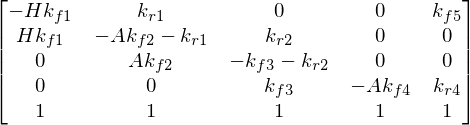

In [36]:
N

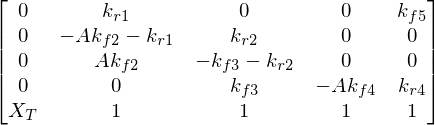

In [37]:
NX0

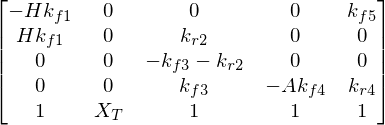

In [38]:
NX1

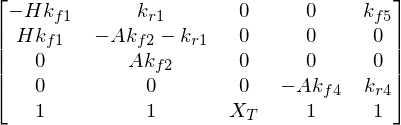

In [39]:
NX1A

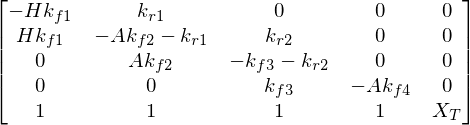

In [40]:
NX2A

# Rate law 1

\begin{equation}
v = k_{f1}HX_0 - k_{r1}X_1
\end{equation}

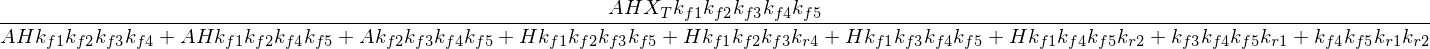

In [41]:
v = kf1*H*NX0.det()/N.det() - kr1*NX1.det()/N.det() 
simplify(v)

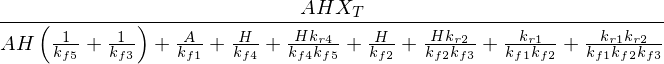

In [42]:
nom = fraction(simplify(v))[0]
denom = fraction(simplify(v))[1]
nomdiv = nom/(kf1*kf2*kf3*kf4*kf5)
denomdiv = denom/(kf1*kf2*kf3*kf4*kf5)

v = simplify(nomdiv)/simplify(denomdiv)
v

v = simplify(nomdiv)/collect(collect(simplify(denomdiv),A**2*H),A*H)
v

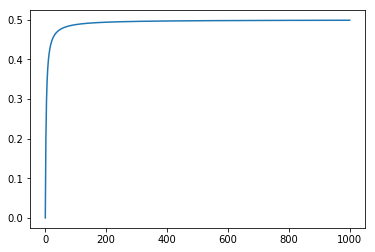

In [76]:
def vfunc(A,H,kf1,kr1,kf2,kr2,kf3,kf4,kr4,kf5,XT):
    nom = A*H*XT
    denom = A*H*(1/kf3 + 1/kf5) + A/kf1 + H/kf4 + H*kr4/(kf4*kf5) + H/kf2 + H*kr2/(kf2*kf3) + kr1/(kf1*kf2) + kr1*kr2/(kf1*kf2*kf3)
    return nom/denom

space = np.linspace(0,1000,1000)
plt.plot(space,vfunc(space,space,kf1=1,kr1=1,kf2=1,kr2=1,kf3=1,kf4=1,kr4=1,kf5=1,XT=1))

# Rate law 2

\begin{equation}
v = k_{f3}[X_1A]
\end{equation}

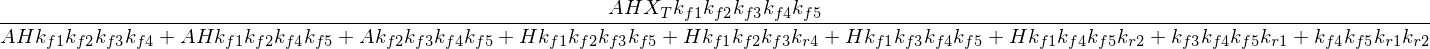

In [52]:
v2 = kf3*(NX1A.det()/N.det())
simplify(v2)

In [53]:
nom2 = fraction(simplify(v2))[0]
denom2 = fraction(simplify(v2))[1]
nomdiv2 = nom2/(kf1*kf2*kf3*kf4*kf5)
denomdiv2 = denom2/(kf1*kf2*kf3*kf4*kf5)

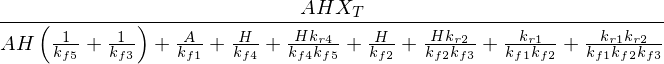

In [54]:
v2 = simplify(nomdiv2)/collect(collect(simplify(denomdiv2),A**2*H),A*H)
v2

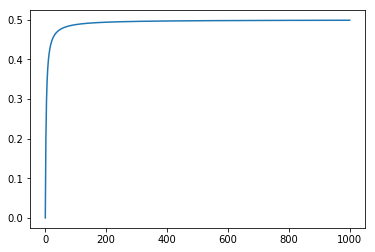

In [55]:
def v2func(A,H,kf1,kr1,kf2,kr2,kf3,kf4,kr4,kf5,XT):
    nom = A*H*XT
    denom = A*H*(1/kf3 + 1/kf5) + A/kf1 + H/kf4 + H*kr4/(kf4*kf5) + H/kf2 + H*kr2/(kf2*kf3) + kr1/(kf1*kf2) + kr1*kr2/(kf1*kf2*kf3)
    return nom/denom

space = np.linspace(0,1000,1000)
plt.plot(space,v2func(space,space,kf1=1,kr1=1,kf2=1,kr2=1,kf3=1,kf4=1,kr4=1,kf5=1,XT=1))

# Rate law 3

\begin{equation}
v = k_{f3}[X_1A] + k_{f5}[X_2A]
\end{equation}

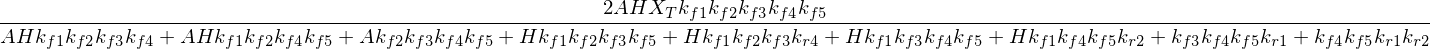

In [59]:
v3 = kf3*NX1A.det()/N.det() + kf5* NX2A.det()/N.det()
simplify(v3)

In [60]:
nom3 = fraction(simplify(v3))[0]
denom3 = fraction(simplify(v3))[1]
nomdiv3 = nom3/(kf1*kf2*kf4*kf5*kf3)
denomdiv3 = denom3/(kf1*kf2*kf4*kf5*kf3)

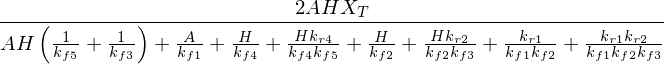

In [61]:
v3 = simplify(nomdiv3)/collect(collect(simplify(denomdiv3),A**2*H),A*H)
v3

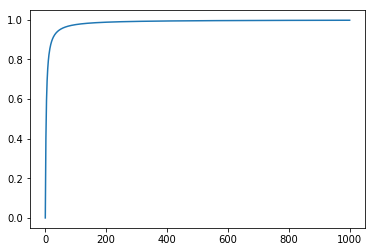

In [63]:
def v3func(A,H,kf1,kr1,kf2,kr2,kf3,kf4,kr4,kf5,XT):
    nom = 2*A*H*XT
    denom = A*H*(1/kf3 + 1/kf5) + A/kf1 + H/kf4 + H*kr4/(kf4*kf5) + H/kf2 + H*kr2/(kf2*kf3) + kr1/(kf1*kf2) + kr1*kr2/(kf1*kf2*kf3)
    return nom/denom

space = np.linspace(0,1000,1000)
plt.plot(space,v3func(space,space,kf1=1,kr1=1,kf2=1,kr2=1,kf3=1,kf4=1,kr4=1,kf5=1,XT=1))